In [1]:
#Homework 5
#Ethan Witkowski

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 
import numpy as np
from psychopy import visual, core, event
from os import listdir
from functools import partial
import random as rnd
import os

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# 1

In [3]:
#Import memory experiment data

#Create list of files
files = [f for f in listdir("C:\\Users\\ethan\\Desktop\\Swarthmore\\Fall 2019\\Scientific Computing\\Homework Assignments\\HW5\\PSYC027_INTEGRATE_data\\PSYC027_INTEGRATE_data") if f.endswith('.txt')]

#Function to separate fields by tabs
mapfunc = partial(pd.read_csv, sep ='\t')

#Concatenate into dataframe, re-index
data = pd.concat(map(mapfunc, files), ignore_index=True)

In [4]:
#Outlier exclusion criteria
SD_thres = 5

#Array of zscore values for each trial
zscores = st.zscore(data.RT)

In [5]:
#List of unique subjects
unique_subjects = [f for f in set(data.SubjectNumber)]

In [6]:
#Response time priming effect for each group for b,nb,baseline

#Declare lists
priming_b = []
priming_nb = []
priming_baseline = []

#Declare sub-list for each unique subject
for i,subject in enumerate(unique_subjects):
    priming_b_subject = []
    priming_nb_subject = []
    priming_baseline_subject = []

    for ctr,subj in enumerate(data.SubjectNumber):
        
        if subj == subject:

            #Pass first trial
            if ctr==0:
                pass

            else:
                #Check conditions for current iteration
                validcurrent = (data.PairType[ctr] == 'P23', data.PrimeType[ctr] == 'P2', data.Accuracy[ctr] == 1, zscores[ctr] < SD_thres)
                validcurrent = np.all(validcurrent)

                #Check conditions for next iteration
                validprev = (data.PairType[ctr-1]=='P23' and data.PrimeType[ctr-1]=='P1' and data.Accuracy[ctr-1]==1 and zscores[ctr-1] < SD_thres)
                validprev = np.all(validprev)

                if validcurrent & validprev:
                    if data.BoundaryType[ctr]=='B' and data.BoundaryType[ctr-1]=='B':
                        priming_b_subject = np.append(priming_b_subject,data.RT[ctr]-data.RT[ctr-1])

                elif data.BoundaryType[ctr]=='NB' and data.BoundaryType[ctr-1]=='NB':
                    priming_nb_subject = np.append(priming_nb_subject,data.RT[ctr]-data.RT[ctr-1])

                else:
                    validbaseline = data.ItemOldNew[ctr]=='old' and data.ItemOldNew[ctr-1]=='old' and \
                    data.Accuracy[ctr]==1 and data.Accuracy[ctr-1]==1 and zscores[ctr] < SD_thres and zscores[ctr-1] < SD_thres         

                    if validbaseline:
                        priming_baseline_subject = np.append(priming_baseline_subject,data.RT[ctr]-data.RT[ctr-1])

    priming_b.append(priming_b_subject)
    priming_nb.append(priming_nb_subject)            
    priming_baseline.append(priming_baseline_subject) 

In [7]:
#Find mean response time for each subject in each subject (Boundary, Non-Boundary, Baseline)

#Boundary
mean_priming_b = np.empty([len(priming_b)])

for i,subject in enumerate(priming_b):
    
    mean_priming_b[i] = np.mean(subject)
    
print(mean_priming_b)

#Non-Boundary
mean_priming_nb = np.empty([len(priming_nb)])

for j,subject2 in enumerate(priming_nb):
    
    mean_priming_nb[j] = np.mean(subject2)
    
print(mean_priming_nb)

#Baseline
mean_priming_baseline = np.empty([len(priming_baseline)])

for k,subject3 in enumerate(priming_baseline):
    
    mean_priming_baseline[k] = np.mean(subject3)
    
print(mean_priming_baseline)

[-0.03053571  0.01021429  0.13896552  0.2239      0.16122222  0.11328571
  0.07656     0.11764706 -0.12953846  0.00229167 -0.23481481  0.00292593
  0.08907407 -0.00436667  0.18925806 -0.136       0.02227273  0.03203125
  0.07438095  0.05861538  0.4202    ]
[-0.04603279 -0.01392308  0.10933333 -0.00237037 -0.04632727 -0.00522222
 -0.06227451  0.09028333  0.00853704 -0.15853704 -0.10561224 -0.02213725
 -0.02055769 -0.0217551   0.08790741 -0.01701613 -0.10910526  0.00382
  0.02539623  0.01532727  0.00786207]
[ 0.00444118 -0.02415068  0.02829032 -0.06069565 -0.0138169   0.0996
 -0.07909722  0.03554545 -0.00283824 -0.02068182 -0.01261111 -0.05951471
 -0.04476786 -0.05402857 -0.06512698 -0.07361364  0.05098113 -0.0170411
 -0.04864179 -0.01201493 -0.09185714]


In [8]:
#Calculate mean response time priming effect across boundary, non-boundary, baseline
group_mean_priming_b = np.mean(mean_priming_b)
print(group_mean_priming_b)

group_mean_priming_nb = np.mean(mean_priming_nb)
print(group_mean_priming_nb)

group_mean_priming_baseline = np.mean(mean_priming_baseline)
print(group_mean_priming_baseline)

0.057028056496825415
-0.013447823004225368
-0.021982869036230784


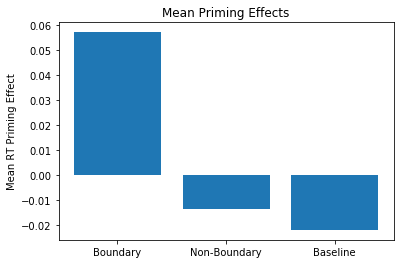

In [9]:
#Plot bar graph of priming effects across b, nb, bl

groups = ('Boundary', 'Non-Boundary', 'Baseline')
x_axis = np.arange(len(groups))
mean_priming = (group_mean_priming_b, group_mean_priming_nb, group_mean_priming_baseline)

plt.bar(x_axis, mean_priming, align = 'center')
plt.xticks(x_axis, groups)
plt.ylabel('Mean RT Priming Effect')
plt.title('Mean Priming Effects')

plt.show()

In [10]:
#T-test between Boundary, Non-Boundary mean priming effects
print('Given alpha = .05:')
print('')

stat_b_nb, pval_b_nb = st.ttest_rel(mean_priming_b, mean_priming_nb)
print('There is a significant difference between the boundary and non-boundary groups, \
given the p-value of ' + str(pval_b_nb))
print('')

#T-test between Boundary, Baseline mean priming effects
stat_b_bl, pval_b_bl = st.ttest_rel(mean_priming_b, mean_priming_baseline)
print('There is a significant difference between the boundary and baseline groups, \
given the p-value of ' + str(pval_b_bl))
print('')

#T-test between Non-Boundary, Baseline mean priming effects
stat_b_bl, pval_nb_bl = st.ttest_rel(mean_priming_nb, mean_priming_baseline)
print('There is no significant difference between the non-boundary and baseline groups, \
given the p-value of ' + str(pval_nb_bl))

Given alpha = .05:

There is a significant difference between the boundary and non-boundary groups, given the p-value of 0.018474752287912576

There is a significant difference between the boundary and baseline groups, given the p-value of 0.028545079827886403

There is no significant difference between the non-boundary and baseline groups, given the p-value of 0.6276525346598885


# 2

In [11]:
#Read-in memory experiment data
mem_data = pd.read_csv('lecture15_catfr_retrieval_data.txt')

In [12]:
#Define words list
words = list(mem_data.word)

In [13]:
#Set number of targets
ntargets = input("Please input the number of targets: ")
ntargets = int(ntargets)

#Set number of lures
nlures = input("Please input the number of lures: ")
nlures = int(nlures)

Please input the number of targets: 10
Please input the number of lures: 10


In [14]:
mem_data.head()

,subj,task,session,list,word,category,intrusion,rectime
0,R1004D,catFR1,0,1,SPARROW,Birds,0,6.789
1,R1004D,catFR1,0,2,GIRAFFE,Zoo,0,7.062
2,R1004D,catFR1,0,2,BEAR,Zoo,0,17.654
3,R1004D,catFR1,0,6,CHEESECAKE,Desserts,0,4.894
4,R1004D,catFR1,0,6,CAKE,Desserts,0,6.017


In [15]:
#Randomly select targets and lures

#Choose random trials without replacement to be targets
targets = mem_data.sample(n=ntargets, replace=False)

#Choose random trials without replacement to be lures
lures = mem_data.sample(n=nlures, replace=False)

#Concatenate lures and targets
sample_mem_data = pd.concat([targets, lures], ignore_index=True)

#Insert column to hold target/lure value
sample_mem_data.insert(1, "type", list(range(len(sample_mem_data.word))))

#Populate column with target/lure values
for i,type_i in enumerate(sample_mem_data.word):
    
    if type_i in list(lures.word):
        sample_mem_data.type[i] = "lure"
        
    elif type_i in list(targets.word):
        sample_mem_data.type[i] = "target"

#Randomize sample memory dataframe
sample_mem_data = sample_mem_data.reindex(np.random.permutation(sample_mem_data.index))
sample_mem_data = sample_mem_data.reset_index(drop=True)

#Reset memory dataframe
mem_data = pd.read_csv('lecture15_catfr_retrieval_data.txt')

sample_mem_data.head()

C:\Users\ethan\Anaconda3\envs\psypy3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ethan\Anaconda3\envs\psypy3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ethan\Anaconda3\envs\psypy3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,subj,type,task,session,list,word,category,intrusion,rectime
0,R1375C,target,catFR1,2,7,PANTS,Clothing,0,2.545
1,R1247P,lure,catFR1,1,12,CROWBAR,Tools,0,12.534
2,R1354E,lure,catFR1,3,1,MIXER,Appliances,0,23.676
3,R1240T,target,catFR1,0,2,THUNDERSTORM,Weather,0,26.687
4,R1302M,lure,catFR1,1,11,MILK,Beverages,3,1.912


In [16]:
#Pre-allocate arrays for data collected during experiment

#Pre-allocate numpy array of responses
responses = np.empty([1,len(sample_mem_data.word)], dtype = "object")

#Pre-allocate array of results
results = np.empty([1,len(sample_mem_data.word)], dtype = "object")

#Pre-allocate arry of old/new response
old_new = np.empty([1,len(sample_mem_data.word)], dtype = "object")

#Pre-allocate array of confidence
confidence = np.empty([1,len(sample_mem_data.word)], dtype = "object")

#Pre-allocate array of response times
RT = np.empty([1,len(sample_mem_data.word)], dtype = "object")

In [17]:
#Experiment
#Encoding phase

#Create window
win = visual.Window([400,400])

#Show target words to participant with 1-second delay
for target in targets.word:
    stim = visual.TextStim(win,text=target.rstrip('\n'))
    stim.draw()
    win.flip()
    core.wait(1)
    
#Intermediate phase

#Present window asking participant to input 'i' to move to test phase
stim = visual.TextStim(win,text='Please press "i" to move on to test phase.')
stim.draw()
win.flip()
pressedkey = event.waitKeys(keyList = ["i"])
if pressedkey[0] == 'i':
    win.flip()
    core.wait(1)
    
#Test Phase

for i,test_word in enumerate(sample_mem_data.word):
    
    #If subject number is even
    if int(sample_mem_data.subj[i][4]) & 1:

        #Present word
        stim = visual.TextStim(win,text=test_word.rstrip('\n'))
        stim.draw()
        win.flip()

        #Gather response, response time
        prestime = core.getTime()
        pressedinfo = event.waitKeys(keyList=['1','2','3','4','5'], timeStamped=True)
        
        #Collect response
        responses[0][i] = pressedinfo[0][0]

        #Collect response time
        RT[0][i] = pressedinfo[0][1]-prestime

        #Collect confidence
        if pressedinfo[0][0] == '1' or pressedinfo[0][0] == '5':
            confidence[0][i] = 'sure'

        elif pressedinfo[0][0] == '2' or pressedinfo[0][0] == '4':
            confidence[0][i] = 'unsure'

        elif pressedinfo[0][0] == '3':
            confidence[0][i] = "don't_know"

        #Collect determination of old/new
        if pressedinfo[0][0] == '1' or pressedinfo[0][0] == '2':
            old_new[0][i] = 'new'

        elif pressedinfo[0][0] == '4' or pressedinfo[0][0] == '5':
            old_new[0][i] = 'old'

        elif pressedinfo[0][0] == '3':
            old_new[0][i] = 'unsure'

        #Collect results
        
        if (pressedinfo[0][0] == '4' or pressedinfo[0][0] == '5') & (sample_mem_data.word[i] in list(targets.word)):
            results[0][i] = str("hit")

        elif (pressedinfo[0][0] == '4' or pressedinfo[0][0] == '5') & (sample_mem_data.word[i] in list(lures.word)):
            results[0][i] = str("false alarm")

        elif (pressedinfo[0][0] == '1' or pressedinfo[0][0] == '2') & (sample_mem_data.word[i] in list(targets.word)):
            results[0][i] = str("miss")

        elif (pressedinfo[0][0] == '1' or pressedinfo[0][0] == '2') & (sample_mem_data.word[i] in list(lures.word)):
            results[0][i] = str("correct rejection")

        elif (pressedinfo[0][0] == '3'):
            results[0][i] = str('null')


    
    else:
        
        #Present word
        stim = visual.TextStim(win,text=test_word.rstrip('\n'))
        stim.draw()
        win.flip()

        #Gather response, response time
        prestime = core.getTime()
        pressedinfo = event.waitKeys(keyList=['1','2','3','4','5'], timeStamped=True)
        
        #Collect response
        responses[0][i] = pressedinfo[0][0]

        #Collect response time
        RT[0][i] = pressedinfo[0][1]-prestime

        #Collect confidence
        if pressedinfo[0][0] == '1' or pressedinfo[0][0] == '5':
            confidence[0][i] = 'sure'

        elif pressedinfo[0][0] == '2' or pressedinfo[0][0] == '4':
            confidence[0][i] = 'unsure'

        elif pressedinfo[0][0] == '3':
            confidence[0][i] = "don't_know"

        #Collect determination of old/new
        if pressedinfo[0][0] == '4' or pressedinfo[0][0] == '5':
            old_new[0][i] = 'new'

        elif pressedinfo[0][0] == '1' or pressedinfo[0][0] == '2':
            old_new[0][i] = 'old'

        elif pressedinfo[0][0] == '3':
            old_new[0][i] = 'unsure'

        #Collect results
        if (pressedinfo[0][0] == '1' or pressedinfo[0][0] == '2') & (sample_mem_data.word[i] in list(targets.word)):
            results[0][i] = str("hit")

        elif (pressedinfo[0][0] == '1' or pressedinfo[0][0] == '2') & (sample_mem_data.word[i] in list(lures.word)):
            results[0][i] = str("false alarm")

        elif (pressedinfo[0][0] == '4' or pressedinfo[0][0] == '5') & (sample_mem_data.word[i] in list(targets.word)):
            results[0][i] = str("miss")

        elif (pressedinfo[0][0] == '4' or pressedinfo[0][0] == '5') & (sample_mem_data.word[i] in list(lures.word)):
            results[0][i] = str("correct rejection")

        elif (pressedinfo[0][0] == '3'):
            results[0][i] = str('null')


win.close()

68.8472 	WARNING 	Monitor specification not found. Creating a temporary one...


In [18]:
#Place experiment data arrays in dataframe

exp_mem_data = sample_mem_data.copy()

#Drop unnecessary columns
exp_mem_data = exp_mem_data.drop(columns=['task', 'session', 'list', 'category', 'intrusion', 'rectime'])


data_fields = [responses, results, old_new, confidence, RT]

for i,field in enumerate(data_fields):
    
    exp_mem_data.insert(1, 'name', list(field[0]), allow_duplicates = True)
    
exp_mem_data.columns = ['Subject Number', 'Response Time', 'Confidence', 'Response Old/New', \
                        'Hit/Miss/False Alarm/Correct Rejection', 'Response Button', 'Target Lure Status', 'Word']

exp_mem_data.head()

,Subject Number,Response Time,Confidence,Response Old/New,Hit/Miss/False Alarm/Correct Rejection,Response Button,Target Lure Status,Word
0,R1375C,1.585459,sure,new,miss,1,target,PANTS
1,R1247P,0.493839,sure,old,false alarm,5,lure,CROWBAR
2,R1354E,0.549208,unsure,old,false alarm,2,lure,MIXER
3,R1240T,0.155754,unsure,new,miss,4,target,THUNDERSTORM
4,R1302M,0.251694,don't_know,unsure,null,3,lure,MILK


In [19]:
#Export dataframe to .csv

exp_mem_data.to_csv(index=False)

"Subject Number,Response Time,Confidence,Response Old/New,Hit/Miss/False Alarm/Correct Rejection,Response Button,Target Lure Status,Word\r\nR1375C,1.5854588000802323,sure,new,miss,1,target,PANTS\r\nR1247P,0.4938391000032425,sure,old,false alarm,5,lure,CROWBAR\r\nR1354E,0.5492079000687227,unsure,old,false alarm,2,lure,MIXER\r\nR1240T,0.1557536000618711,unsure,new,miss,4,target,THUNDERSTORM\r\nR1302M,0.2516944999806583,don't_know,unsure,null,3,lure,MILK\r\nR1028M,0.26211350003723055,sure,old,hit,1,target,SOFA\r\nR1266J,0.16026769997552037,unsure,new,correct rejection,4,lure,FUDGE\r\nR1321M,0.14918220008257776,unsure,new,correct rejection,2,lure,BOOKCASE\r\nR1377M,0.12224179995246232,sure,old,hit,5,target,CARNATION\r\nR1135E,0.3799025999614969,sure,new,correct rejection,1,lure,CEILING\r\nR1119P,0.20868669997435063,unsure,old,hit,4,target,TRUCK\r\nR1065J,0.1810958000132814,unsure,new,miss,2,target,COAT\r\nR1395M,0.10278840002138168,don't_know,unsure,null,3,target,EYE\r\nR1176M,0.2560807999

# 3

In [20]:
#Create list of images in zip file


images = os.listdir(r"C:\Users\ethan\Desktop\Swarthmore\Fall 2019\Scientific Computing\Homework Assignments\HW5\images\images")

win = visual.Window([600,600],pos=[0,0])

display_time = 1
intermission = .5

for image in images:
    stim = visual.ImageStim(win, image=image)
    stim.draw() # vs .autoDraw=True
    #stim.autoDraw=True
    win.flip()
    core.wait(display_time)
    win.flip()
    core.wait(intermission)
    
win.close()

106.5414 	WARNING 	Monitor specification not found. Creating a temporary one...
